# Calculus Background

In this course, we will be concerned with improving the performance of an engineering system that we are able to manipulate with design variables $x \in \mathbb{R}^{n}$. In this course, we'll assume that we have a mathematical model that gives the performance at design point $x$. This will be our objective function $f(x)$. This objective function will return a scalar value, given the vector of design variables. Mathematically, we can express this as
\begin{equation*}
    f(x) : \mathbb{R}^{n} \rightarrow \mathbb{R}.
\end{equation*}
Given a vector in $\mathbb{R}^{n}$, $f$ returns a scalar.

In this course, our standing assumption will be that $f(x)$ is smooth. For us, this will mean that the function $f(x)$ has as many derivatives as we wish that are continuous and defined everywhere. This assumption can obviously be violated in practical engineering design problems, but we'll deal with those cases later.

A Taylor series approximation of $f(x)$ can be formed about a point $x$ in the design space. This approximation can be directed from $x$ along a direction $p \in \mathbb{R}^{n}$.
\begin{equation*}
    f(x + p) \approx f(x) + \nabla f(x)^{T} p + \frac{1}{2} p^{T} H(x) p.
\end{equation*}

Here $\nabla f(x)$ is called the gradient. It is a vector. It has components defined as
\begin{equation*}
    \nabla f(x) = \begin{bmatrix}
        \frac{\partial f}{\partial x_{1}} \\
        \frac{\partial f}{\partial x_{2}} \\
        \vdots \\
        \frac{\partial f}{\partial x_{n}} \\
    \end{bmatrix}.
\end{equation*}
The gradient points in the direction of maximum increasing function value. It points uphill.

The matrix $H(x) = H(x)^{T} \in \mathbb{R}^{n \times n}$ is the Hessian matrix. It consists of a matrix of second partial derivatives. It is symmetric because the second order mixed partial derivatives are equal $\frac{\partial^2 f}{\partial x_{i} \partial x_{j}} = \frac{\partial^2 f}{\partial x_{j} \partial x_{i}}$ due to the assumption of smoothness. The components of the Hessian matrix are
\begin{equation*}
    H(x) = \begin{bmatrix}
    \frac{\partial^2 f}{\partial x_{1}^2} & \frac{\partial^2 f}{\partial x_{1} \partial x_{2}} & \ldots & \frac{\partial^2 f}{\partial x_{1} \partial x_{n}} \\
    \frac{\partial^2 f}{\partial x_{2} \partial x_{1}} & \frac{\partial^2 f}{\partial x_{2}^2} & \ldots & \frac{\partial^2 f}{\partial x_{2} \partial x_{n}} \\
    \vdots & \vdots & & \vdots \\
    \frac{\partial^2 f}{\partial x_{n} \partial x_{1}} & \frac{\partial^2 f}{\partial x_{n} \partial x_{2}} & \ldots & \frac{\partial^2 f}{\partial x_{n}^2} \\
    \end{bmatrix}
\end{equation*}


### Example

Consider the following function $f(x): \mathbb{R}^{2} \rightarrow \mathbb{R}$:

\begin{equation*}
    f(x) = (1 - x_{1})^2 + 100(x_{2} - x_{1}^2)^2
\end{equation*}

The gradient of the function is given by
\begin{equation*}
    \nabla f = \begin{bmatrix}
        -2 (1 - x_{1}) - 400 x_{1} (x_{2} - x_{1}^2) \\
        200(x_{2} - x_{1}^{2}) \\
    \end{bmatrix}
\end{equation*}

The Hessian matrix is given by
\begin{equation*}
    H(x) = 
    \begin{bmatrix}
        2 - 400( x_{2} - x_{1}^2) + 800 x_{1}^{2} & - 400 x_{1} \\
        - 400 x_{1} & 200 \\
    \end{bmatrix}
\end{equation*}


In [2]:
import numpy as np

def f(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

def g(x):
    return np.array([-2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2), 
                    200*(x[1] - x[0]**2)])

def H(x):
    return np.array([[2 - 400*(x[1] - x[0]**2) + 800*x[0]**2, -400*x[0]],
                    [-400*x[0], 200]])

# Test the gradient and Hessian implementations against the function
h = 1e-6
x = np.random.uniform(size=2)
p = np.random.uniform(size=2)

# Test the gradient implementation to see if it matches against finite-difference
print('Gradient error: ', 0.5*(f(x + h*p) - f(x - h*p))/h - np.dot(g(x), p))

# Test the Hessian implementation to see if it matches against the gradient
print('Hessian error:  ', 0.5*(g(x + h*p) - g(x - h*p))/h - np.dot(H(x), p))

Gradient error:  -5.4372506497202266e-11
Hessian error:   [-2.24297025e-10  6.72258693e-10]


## Contour plots

We will use a lot of contour plots in this course. These are very useful to sketch, but require a bit of interpretation. A contour plot in two dimensions is a plot of the iso-value lines of a function such that $f(x) = c$. This definition is generally not a useful way to generate a contour plot by hand.

A key property of the contour plot, is that the gradient direction $\nabla f$ is perpendicular to the contour lines (as long as your axes are equal in your plots!). When you know which way the gradient points, you can tell which is uphill and what is downhill.

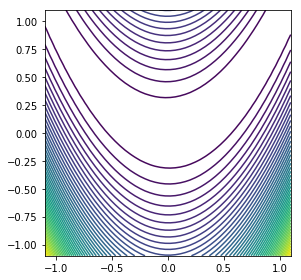

In [9]:
import matplotlib.pylab as plt

m = 50
x = np.linspace(-1.1, 1.1, m)
y = np.linspace(-1.1, 1.1, m)
X, Y = np.meshgrid(x, y)
F = np.zeros(X.shape)

for j in range(m):
    for i in range(m):
        F[i,j] = f([X[i,j], Y[i,j]])

fig, ax = plt.subplots(1, 1)
ax.contour(X, Y, F, levels=np.linspace(0, np.max(F)))
ax.set_aspect('equal', 'box')
fig.tight_layout()
plt.show()